# exploration

In [96]:
import pandas as pd
df = pd.read_csv("./data/generated_data.csv")
print(df.shape)
df.info()
df.describe()

(100000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   policy_id       100000 non-null  float64
 1   demand_pattern  100000 non-null  float64
 2   C1              100000 non-null  float64
 3   C2              100000 non-null  float64
 4   C3              100000 non-null  float64
 5   C4              100000 non-null  float64
 6   C5              100000 non-null  float64
 7   C6              100000 non-null  float64
 8   C7              100000 non-null  float64
 9   C8              100000 non-null  float64
 10  C9              100000 non-null  float64
 11  C10             100000 non-null  float64
 12  C11             100000 non-null  float64
 13  C12             100000 non-null  float64
 14  C13             100000 non-null  float64
 15  C14             100000 non-null  float64
 16  cost            100000 non-null  float64
dty

,policy_id,demand_pattern,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,cost
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.0,100000.000000
mean,499.500000,49.500000,220.177000,283.507000,239.090000,259.419000,279.65500,54.972000,39.006000,27.499000,93.812000,31.056000,121.859000,27.489000,19.0,15.0,480.668430
std,288.676434,28.866214,6.105247,7.755421,6.424976,6.847329,7.57869,1.364271,0.807447,0.500002,2.568798,0.820287,3.102453,0.499881,0.0,0.0,158.023120
min,0.000000,0.000000,210.000000,270.000000,229.000000,248.000000,267.00000,53.000000,38.000000,27.000000,90.000000,30.000000,117.000000,27.000000,19.0,15.0,224.506000
25%,249.750000,24.750000,215.000000,277.000000,233.000000,253.000000,273.00000,54.000000,38.000000,27.000000,92.000000,30.000000,119.000000,27.000000,19.0,15.0,369.281375
50%,499.500000,49.500000,220.000000,284.000000,239.000000,259.000000,280.00000,55.000000,39.000000,27.000000,94.000000,31.000000,122.000000,27.000000,19.0,15.0,451.111500
75%,749.250000,74.250000,226.000000,290.000000,245.000000,265.000000,286.00000,56.000000,40.000000,28.000000,96.000000,32.000000,124.250000,28.000000,19.0,15.0,550.564250
max,999.000000,99.000000,230.000000,296.000000,250.000000,271.000000,292.00000,57.000000,40.000000,28.000000,98.000000,32.000000,127.000000,28.000000,19.0,15.0,1387.609500


Text(0.5, 1.0, 'Distribution of Cost')

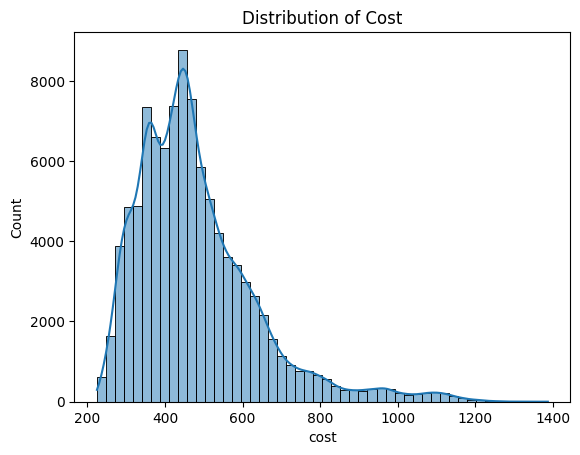

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['cost'], bins=50, kde=True)
plt.title("Distribution of Cost")


Text(0.5, 1.0, 'Correlation with Cost')

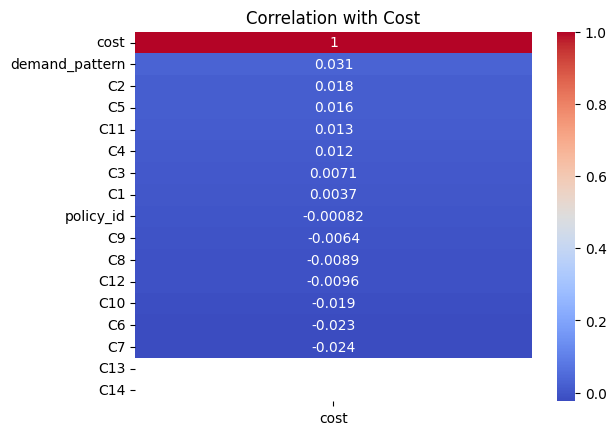

In [98]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr[['cost']].sort_values(by='cost', ascending=False), annot=True, cmap="coolwarm")
plt.title("Correlation with Cost")


In [107]:
nunique = df.nunique()
print("Constant columns:", nunique[nunique == 1])
print(X_input[['C13', 'C14']].nunique())
print(X_input[['C13', 'C14']].head())


Constant columns: Series([], dtype: int64)
C13    1
C14    1
dtype: int64
   C13  C14
0  200  200


In [110]:
#dropping C13 & C14 
X_input = X_input.drop(columns=[col for col in ['C13', 'C14'] if col in X_input.columns])


Text(0.5, 1.0, 'Cost Distribution per Demand Pattern')

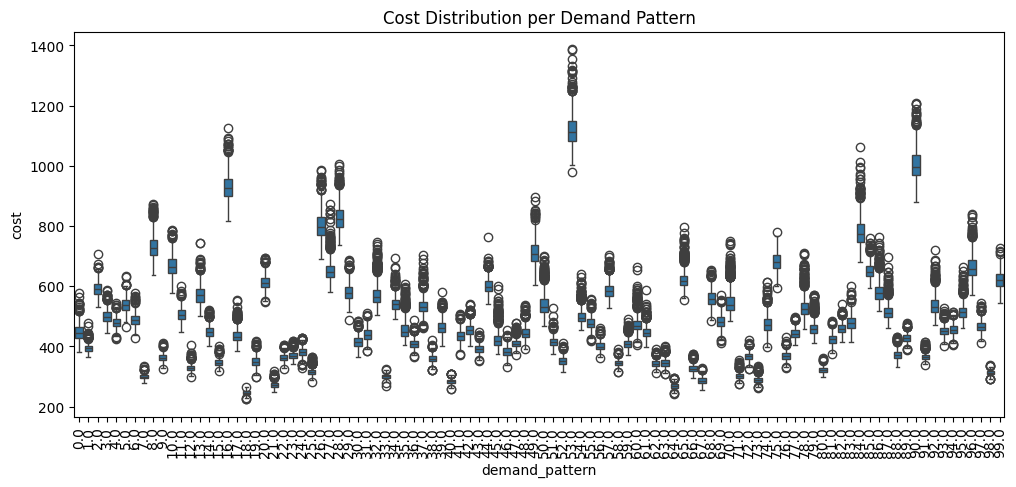

In [111]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='demand_pattern', y='cost')
plt.xticks(rotation=90)
plt.title("Cost Distribution per Demand Pattern")


In [117]:
df = df.drop_duplicates()
print(f"Remaining rows after deduplication: {len(df)}")


Remaining rows after deduplication: 100000


----

This project addresses the challenge of building data-driven policies that minimize total cost in a supply chain with uncertain demand, lead times, and capacity constraints — based on ASML's stylized network model.

Ridge - MAE: 116.72, MSE: 25140.38
Random Forest - MAE: 16.34, MSE: 584.21
Gradient Boosting - MAE: 54.64, MSE: 4865.20
HistGradientBoosting - MAE: 19.66, MSE: 754.15
Extra Trees - MAE: 16.50, MSE: 598.87
XGBoost - MAE: 16.03, MSE: 569.92
SVR - MAE: 112.32, MSE: 25960.95


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



MLP - MAE: 104.49, MSE: 19713.43


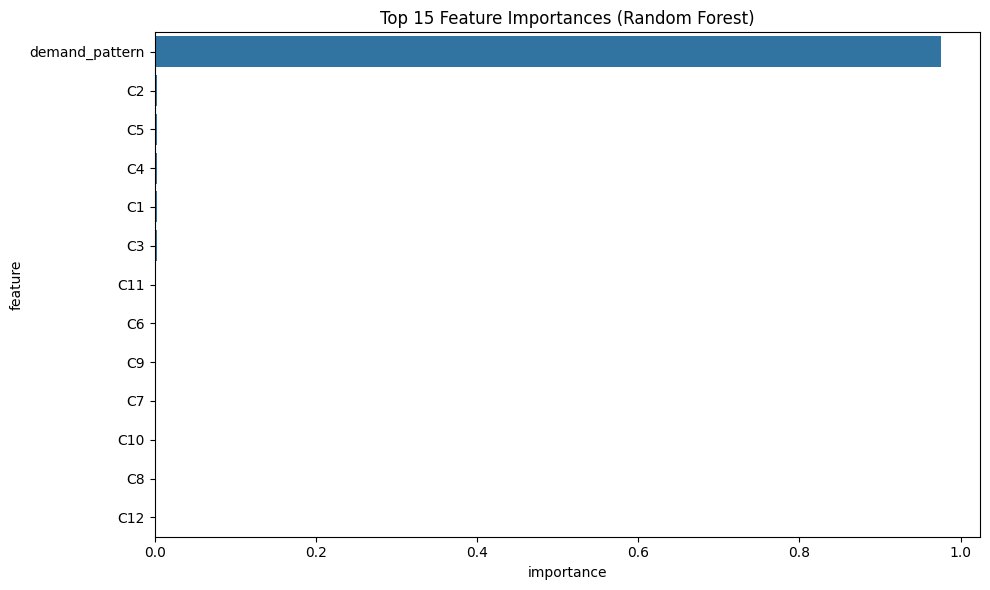

In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor,
    HistGradientBoostingRegressor, ExtraTreesRegressor
)
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# 1. Load and prepare the data
# ----------------------------

df = pd.read_csv("data/generated_data.csv")
df = df.drop_duplicates()
constant_cols = [col for col in df.columns if df[col].nunique() <= 1]
df.drop(columns=constant_cols, inplace=True)

X = df.drop(columns=["policy_id", "cost"])
y = df["cost"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------
# 2. Train multiple models
# ----------------------------

# Standard tree-based and linear models
models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42),
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    results[name] = {"MAE": mae, "MSE": mse}
    print(f"{name} - MAE: {mae:.2f}, MSE: {mse:.2f}")

# ----------------------------
# 2b. Try SVR and MLP (with scaling)
# ----------------------------

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVR
svr = SVR()
svr.fit(X_train_scaled, y_train)
svr_preds = svr.predict(X_test_scaled)
results["SVR"] = {
    "MAE": mean_absolute_error(y_test, svr_preds),
    "MSE": mean_squared_error(y_test, svr_preds)
}
print(f"SVR - MAE: {results['SVR']['MAE']:.2f}, MSE: {results['SVR']['MSE']:.2f}")

# MLP
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)
mlp_preds = mlp.predict(X_test_scaled)
results["MLP"] = {
    "MAE": mean_absolute_error(y_test, mlp_preds),
    "MSE": mean_squared_error(y_test, mlp_preds)
}
print(f"MLP - MAE: {results['MLP']['MAE']:.2f}, MSE: {results['MLP']['MSE']:.2f}")

# ----------------------------
# 3. Plot feature importances (Random Forest)
# ----------------------------

rf_model = models["Random Forest"]
importances = rf_model.feature_importances_
feat_df = pd.DataFrame({
    "feature": X.columns,
    "importance": importances
}).sort_values(by="importance", ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=feat_df)
plt.title("Top 15 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


In [106]:
from sklearn.metrics import mean_absolute_error
import xgboost as xgb  # or any other model you prefer (e.g., RandomForestRegressor)
import numpy as np
import pandas as pd

# Replace this with your full dataset
X = df.drop(columns=['cost'])  # or whatever your target column is
y = df['cost']

# Define the model to use (change to RandomForestRegressor() if needed)
def build_model():
    return xgb.XGBRegressor(n_estimators=100, random_state=42)

# Train the model on full dataset
model = build_model()
model.fit(X, y)

# Example: Predict cost for a manually chosen policy (replace with your values)
example_policy = {
    f'C{i}': 200 for i in range(1, 15)
}
example_policy['demand_pattern'] = 50

# Create input row
X_input = X.iloc[0:1].copy()
for col, value in example_policy.items():
    X_input[col] = value

# Predict and print cost
predicted_cost = model.predict(X_input)[0]
print("Predicted cost for example policy:", predicted_cost)



ValueError: feature_names mismatch: ['policy_id', 'demand_pattern', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'] ['policy_id', 'demand_pattern', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']
training data did not have the following fields: C13, C14

In [4]:
sys.path.append("/Users/wendydewit/ORTEC/src")

In [41]:
from supply_chain_config import SupplyChainConfig
from evaluate import Evaluate
from dynamics import Dynamics
from policy import MeanDemandPolicy, StaticBaseStockPolicyRandom, StaticBaseStockPolicyShortfall
from policy_kopie import OptimizedBaseStockPolicy  # Still using this class, just not Optuna-tuned

# Step 1: Setup
config = SupplyChainConfig()
dynamics = Dynamics(config)
evaluator = Evaluate(config, dynamics, num_trajectories=100, periods_per_trajectory=60)

# Step 2: XGBoost-optimized base stock levels (manually specified)
optimized_base_stock_levels = {
    'C1': 246, 'C2': 330, 'C3': 294, 'C4': 326, 'C5': 350,
    'C6': 291, 'C7': 60, 'C8': 335, 'C9': 272, 'C10': 131,
    'C11': 262, 'C12': 222, 'C13': 67, 'C14': 234  # 'demand_pattern' removed
}
optimized_levels = [optimized_base_stock_levels[f'C{i+1}'] for i in range(config.num_components)]

# Step 3: Create policies
hedging = 0.1
mean_demand_policy = MeanDemandPolicy(config, hedging)
static_bs_random = StaticBaseStockPolicyRandom(config, hedging)
static_bs_shortfall = StaticBaseStockPolicyShortfall(config, hedging)
optimized_policy = OptimizedBaseStockPolicy(config, optimized_levels)

# Step 4: Evaluate policies
policy_names = ["MeanDemandPolicy", "BaseStock_Shortfall", "BaseStock_Random", "XGBoostOptimized"]
policies = [mean_demand_policy, static_bs_shortfall, static_bs_random, optimized_policy]

results = evaluator.compare_policies(policies)

# Step 5: Show results
for name, cost in zip(policy_names, results):
    print(f"{name}: Avg cost = {cost:.2f}")


MeanDemandPolicy: Avg cost = 743.97
BaseStock_Shortfall: Avg cost = 649.15
BaseStock_Random: Avg cost = 717.05
XGBoostOptimized: Avg cost = 26416.26


MAE: 14.21
MSE: 462.74


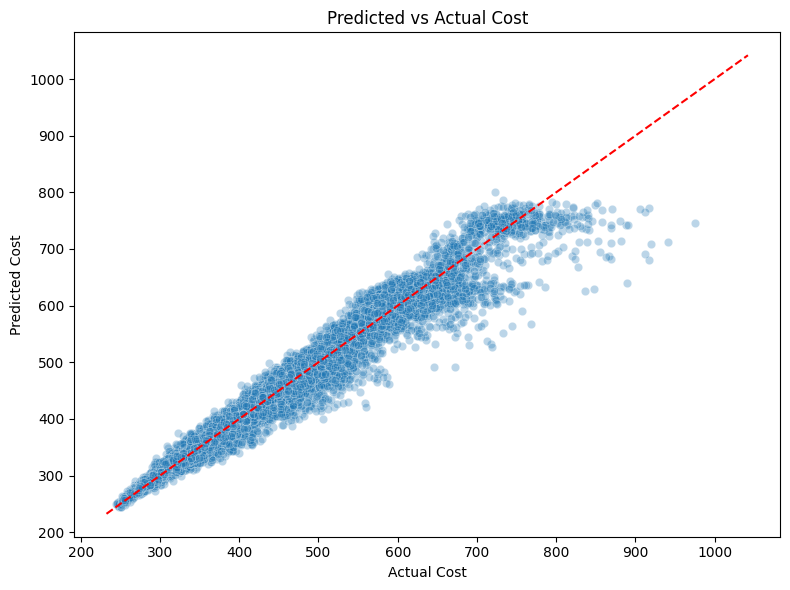


Predicted cost for example policy: 392.61935

Best policy (from data) according to model:
demand_pattern      1.000000
C1                210.000000
C2                270.000000
C3                229.000000
C4                248.000000
C5                267.000000
C6                 53.000000
C7                 38.000000
C8                 27.000000
C9                 90.000000
C10                30.000000
C11               117.000000
C12                27.000000
predicted_cost    233.866928
Name: 1000, dtype: float64


In [55]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# 1. Load the data
# ----------------------------

df = pd.read_csv("data/generated_data.csv")
df = df.drop_duplicates()

# Drop constant columns (if any)
constant_cols = [col for col in df.columns if df[col].nunique() <= 1]
df.drop(columns=constant_cols, inplace=True)

# ----------------------------
# 2. Prepare features and target
# ----------------------------

X = df.drop(columns=["policy_id", "cost"])
y = df["cost"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------
# 3. Train the model
# ----------------------------

model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ----------------------------
# 4. Evaluate model
# ----------------------------

preds = model.predict(X_test)
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")

# ----------------------------
# 5. Visualize predicted vs actual
# ----------------------------

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=preds, alpha=0.3)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Predicted vs Actual Cost")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.tight_layout()
plt.show()

# ----------------------------
# 6. Predict cost for new policy
# ----------------------------

example_policy = {f'C{i}': 200 for i in range(1, 15)}
example_policy['demand_pattern'] = 50

X_input = pd.DataFrame([example_policy])[X.columns]  # same feature order
predicted_cost = model.predict(X_input)[0]
print("\nPredicted cost for example policy:", predicted_cost)

# ----------------------------
# 7. Find best policy in dataset
# ----------------------------

df["predicted_cost"] = model.predict(X[X.columns])
best_row = df.loc[df["predicted_cost"].idxmin()]

print("\nBest policy (from data) according to model:")
print(best_row[[*X.columns, "predicted_cost"]])


In [56]:
from supply_chain_config import SupplyChainConfig
from evaluate import Evaluate
from dynamics import Dynamics
from policy_kopie import OptimizedBaseStockPolicy  # assumes this accepts base stock levels

# Step 1: Setup
config = SupplyChainConfig()
dynamics = Dynamics(config)
evaluator = Evaluate(config, dynamics, num_trajectories=100, periods_per_trajectory=60)

# Step 2: Best policy from model (replace with your actual best params)
best_policy_dict = {
    'demand_pattern': 74,  # only needed if your simulator uses it
    'C1': 210, 'C2': 270, 'C3': 229, 'C4': 248, 'C5': 267,
    'C6': 53, 'C7': 38, 'C8': 27, 'C9': 90, 'C10': 30,
    'C11': 117, 'C12': 27, 'C13': 19, 'C14': 15
}

# Extract only component levels
optimized_levels = [best_policy_dict[f"C{i+1}"] for i in range(config.num_components)]

# Step 3: Create and evaluate policy
xgb_policy = OptimizedBaseStockPolicy(config, optimized_levels)
xgb_cost = evaluator.evaluate_policy(xgb_policy)

print(f"Simulated cost for best XGBoost policy: {xgb_cost:.2f}")


Simulated cost for best XGBoost policy: 25546.51


🔍 Why This Happens
Bad training data:

Most of your generated_data.csv seems to contain policies with poor performance (avg cost ~1400–25000).

You only have a few good policies, so the model doesn’t learn how to distinguish a truly good one.

Model overfitting:

Your model might be overfitting to patterns in the data that don't generalize to the simulation.

Data leakage or poor feature representation:

Features may not capture what really matters in cost determination.

Predicted ≠ Simulated:

You trained on a static dataset, but the real cost is dynamic (with trajectories and demand noise), so your predictions are misleadingly optimistic.

In [57]:
# Load your data
import pandas as pd
df = pd.read_csv("data/generated_data.csv")

# Find the best already existing policy (lowest cost in data)
best_row = df.loc[df["cost"].idxmin()]
best_policy = best_row.drop(labels=["policy_id", "cost"])
best_cost = best_row["cost"]

print("Best existing policy:")
print(best_policy)
print(f"Recorded cost in data: {best_cost:.2f}")


Best existing policy:
demand_pattern      1.0
C1                210.0
C2                270.0
C3                229.0
C4                248.0
C5                267.0
C6                 53.0
C7                 38.0
C8                 27.0
C9                 90.0
C10                30.0
C11               117.0
C12                27.0
C13                19.0
C14                15.0
Name: 1000, dtype: float64
Recorded cost in data: 232.45


In [58]:
from supply_chain_config import SupplyChainConfig
from evaluate import Evaluate
from dynamics import Dynamics
from policy_kopie import OptimizedBaseStockPolicy

config = SupplyChainConfig()
dynamics = Dynamics(config)
evaluator = Evaluate(config, dynamics, num_trajectories=100, periods_per_trajectory=60)

# Replace with actual best policy from data
best_base_stock_levels = [best_policy[f"C{i+1}"] for i in range(config.num_components)]
xgb_policy = OptimizedBaseStockPolicy(config, best_base_stock_levels)

sim_cost = evaluator.evaluate_policy(xgb_policy)
print(f"Simulated cost of best found policy: {sim_cost:.2f}")


Simulated cost of best found policy: 25674.15


Ridge - MAE: 18.95, MSE: 551.63
Random Forest - MAE: 4.71, MSE: 35.60
Gradient Boosting - MAE: 8.05, MSE: 99.09
HistGradientBoosting - MAE: 3.47, MSE: 19.79
Extra Trees - MAE: 5.20, MSE: 43.74
XGBoost - MAE: 3.54, MSE: 20.61
SVR - MAE: 17.88, MSE: 521.35
MLP - MAE: 18.73, MSE: 553.64


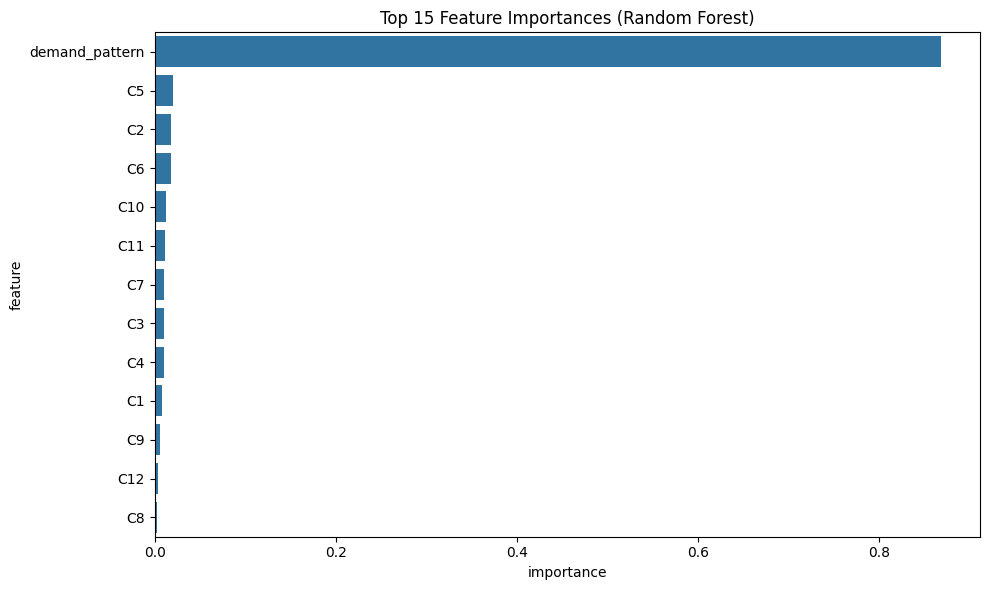

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor,
    HistGradientBoostingRegressor, ExtraTreesRegressor
)
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# 1. Load and prepare the data
# ----------------------------

df = pd.read_csv("data/generated_data.csv")
df = df.drop_duplicates()
constant_cols = [col for col in df.columns if df[col].nunique() <= 1]
df.drop(columns=constant_cols, inplace=True)

X = df.drop(columns=["policy_id", "cost"])
y = df["cost"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------
# 2. Train multiple models
# ----------------------------

# Standard tree-based and linear models
models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42),
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    results[name] = {"MAE": mae, "MSE": mse}
    print(f"{name} - MAE: {mae:.2f}, MSE: {mse:.2f}")

# ----------------------------
# 2b. Try SVR and MLP (with scaling)
# ----------------------------

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVR
svr = SVR()
svr.fit(X_train_scaled, y_train)
svr_preds = svr.predict(X_test_scaled)
results["SVR"] = {
    "MAE": mean_absolute_error(y_test, svr_preds),
    "MSE": mean_squared_error(y_test, svr_preds)
}
print(f"SVR - MAE: {results['SVR']['MAE']:.2f}, MSE: {results['SVR']['MSE']:.2f}")

# MLP
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)
mlp_preds = mlp.predict(X_test_scaled)
results["MLP"] = {
    "MAE": mean_absolute_error(y_test, mlp_preds),
    "MSE": mean_squared_error(y_test, mlp_preds)
}
print(f"MLP - MAE: {results['MLP']['MAE']:.2f}, MSE: {results['MLP']['MSE']:.2f}")

# ----------------------------
# 3. Plot feature importances (Random Forest)
# ----------------------------

rf_model = models["Random Forest"]
importances = rf_model.feature_importances_
feat_df = pd.DataFrame({
    "feature": X.columns,
    "importance": importances
}).sort_values(by="importance", ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=feat_df)
plt.title("Top 15 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


In [66]:
import pandas as pd
import numpy as np
import xgboost as xgb
from src.supply_chain_config import SupplyChainConfig
from src.evaluate import Evaluate
from src.dynamics import Dynamics
from src.policy_kopie import OptimizedBaseStockPolicy

# 1. Load data
df = pd.read_csv("data/generated_data.csv")
X = df.drop(columns=["cost", "policy_id"])
y = df["cost"]

# 2. Train model
model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# 3. Predict costs
df["predicted_cost"] = model.predict(X)

# 4. Find best predicted policy
best_policy_row = df.loc[df["predicted_cost"].idxmin()]
print("Best predicted policy from data:")
print(best_policy_row)

# 5. Prepare for simulation
config = SupplyChainConfig()
dynamics = Dynamics(config)
evaluator = Evaluate(config, dynamics, num_trajectories=30, periods_per_trajectory=60)

# Extract component columns
component_cols = [f"C{i+1}" for i in range(config.num_components)]
base_stock_levels = [best_policy_row[c] for c in component_cols]

# Create and simulate policy
sim_policy = OptimizedBaseStockPolicy(config, base_stock_levels)
simulated_cost = evaluator.evaluate_policy(sim_policy)

print(f"\nSimulated cost of best policy: {simulated_cost:.2f}")
print(f"Predicted cost by model: {best_policy_row['predicted_cost']:.2f}")
print(f"Recorded cost in data: {best_policy_row['cost']:.2f}")



Best predicted policy from data:
policy_id          84.000000
demand_pattern     49.000000
C1                216.000000
C2                272.000000
C3                235.000000
C4                252.000000
C5                282.000000
C6                 56.000000
C7                 40.000000
C8                 28.000000
C9                 96.000000
C10                31.000000
C11               119.000000
C12                28.000000
C13                19.000000
C14                15.000000
cost              400.512433
predicted_cost    398.272095
Name: 14784, dtype: float64

Simulated cost of best policy: 25213.45
Predicted cost by model: 398.27
Recorded cost in data: 400.51


---

In [69]:
import numpy as np
import pandas as pd
from supply_chain_config import SupplyChainConfig
from evaluate import Evaluate
from dynamics import Dynamics
from policy import StaticBaseStockPolicyRandom

# Setup
config = SupplyChainConfig()
dynamics = Dynamics(config)
evaluator = Evaluate(config, dynamics, num_trajectories=1, periods_per_trajectory=60)

# Parameters
num_policies = 200
num_demand_patterns = 10
hedging = 0.1

# Helper: create random deviations for policies
def create_deviation(deviations):
    return [np.random.randint(0, max(1, deviation)) for deviation in deviations]

base_policy = StaticBaseStockPolicyRandom(config, hedging)
base_levels = np.array(base_policy.base_stock_levels)

records = []
for pattern in range(num_demand_patterns):
    for _ in range(num_policies):
        deviations = create_deviation(base_levels // 10)
        policy = StaticBaseStockPolicyRandom(config, hedging, deviations=deviations)
        levels = policy.base_stock_levels
        cost = evaluator.evaluate_policy(policy)
        
        row = {
            "demand_pattern": pattern,
            **{f"C{i+1}": levels[i] for i in range(config.num_components)},
            "cost": cost
        }
        records.append(row)

df = pd.DataFrame(records)
df.to_csv("generated_policy_data.csv", index=False)


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb

df = pd.read_csv("generated_policy_data.csv")
X = df.drop(columns=["cost"])
y = df["cost"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, preds))
print("MSE:", mean_squared_error(y_test, preds))


MAE: 310.0185231009929
MSE: 165362.87836134003


In [71]:
df["predicted_cost"] = model.predict(df.drop(columns=["cost"]))
best_row = df.loc[df["predicted_cost"].idxmin()]
print("Best predicted policy from data:")
print(best_row)


Best predicted policy from data:
demand_pattern      9.000000
C1                186.000000
C2                255.000000
C3                221.000000
C4                219.000000
C5                235.000000
C6                 50.000000
C7                 35.000000
C8                 24.000000
C9                 87.000000
C10                27.000000
C11               109.000000
C12                25.000000
C13                17.000000
C14                14.000000
cost              168.646667
predicted_cost    169.181625
Name: 1816, dtype: float64


In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import (
    RandomForestRegressor,
    ExtraTreesRegressor,
    GradientBoostingRegressor,
    HistGradientBoostingRegressor
)
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
# Uncomment if you want to use LightGBM
import lightgbm as lgb

# Load your data
df = pd.read_csv("generated_policy_data.csv")

# -------- FEATURE ENGINEERING -------- #
# Make a copy so we don't overwrite the original
df_fe = df.copy()

# Sum of base stock levels (proxy for inventory volume)
df_fe["total_stock"] = df_fe[[f"C{i}" for i in range(1, 15)]].sum(axis=1)

# Average base stock level
df_fe["avg_stock"] = df_fe["total_stock"] / 14

# Min and max stock level
df_fe["min_stock"] = df_fe[[f"C{i}" for i in range(1, 15)]].min(axis=1)
df_fe["max_stock"] = df_fe[[f"C{i}" for i in range(1, 15)]].max(axis=1)

# Range between max and min
df_fe["stock_range"] = df_fe["max_stock"] - df_fe["min_stock"]

# Standard deviation of stock levels
df_fe["stock_std"] = df_fe[[f"C{i}" for i in range(1, 15)]].std(axis=1)

# Optional: interaction between demand pattern and total stock
df_fe["demand_x_total"] = df_fe["demand_pattern"] * df_fe["total_stock"]

# Now use this version for training
X = df_fe.drop(columns=["policy_id", "cost"], errors="ignore")

y = df_fe["cost"]


X = df.drop(columns=["cost", "policy_id"], errors="ignore")
y = df["cost"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data for models that need it
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42),
    "LightGBM": lgb.LGBMRegressor(random_state=42),
    "SVR": SVR(),
    "MLP": MLPRegressor(random_state=42, max_iter=500)
}

# Train and evaluate
results = {}

for name, model in models.items():
    if name in ["SVR", "MLP"]:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    results[name] = {"MAE": mae, "MSE": mse}
    print(f"{name} - MAE: {mae:.2f}, MSE: {mse:.2f}")


Ridge - MAE: 266.67, MSE: 124915.61
Random Forest - MAE: 281.78, MSE: 133571.89
Extra Trees - MAE: 281.50, MSE: 134074.98
Gradient Boosting - MAE: 276.53, MSE: 133036.92
HistGradientBoosting - MAE: 286.11, MSE: 142513.05
XGBoost - MAE: 304.61, MSE: 160655.09
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 13
[LightGBM] [Info] Start training from score 656.000889
LightGBM - MAE: 286.06, MSE: 142637.42
SVR - MAE: 253.80, MSE: 128963.79
MLP - MAE: 268.86, MSE: 126430.59


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



In [76]:
num_patterns = df["demand_pattern"].nunique()
print(f"Number of models to train: {num_patterns}")


Number of models to train: 10


/var/folders/x0/byvm3vyj0pd9kk65jhs72_3h0000gn/T/ipykernel_50653/3768261199.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/x0/byvm3vyj0pd9kk65jhs72_3h0000gn/T/ipykernel_50653/3768261199.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/x0/byvm3vyj0pd9kk65jhs72_3h0000gn/T/ipykernel_50653/3768261199.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

Average MAE: 0.0008190156738280241
Average MSE: 1.6182934922006769e-06


/var/folders/x0/byvm3vyj0pd9kk65jhs72_3h0000gn/T/ipykernel_50653/3768261199.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/x0/byvm3vyj0pd9kk65jhs72_3h0000gn/T/ipykernel_50653/3768261199.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



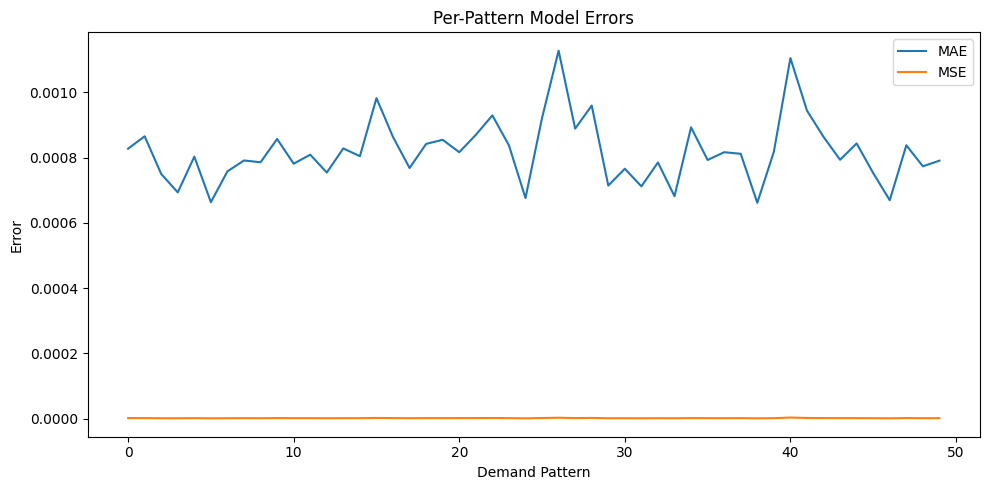

In [77]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

# Load data
df = pd.read_csv("data/generated_data.csv")

# Ensure correct data types
df = df.copy()
df["demand_pattern"] = df["demand_pattern"].astype(int)

# Columns used for modeling
component_cols = [f"C{i+1}" for i in range(14)]

# To store results
best_policies = []
all_metrics = []

# Loop through each demand pattern
for pattern in sorted(df["demand_pattern"].unique()):
    df_pattern = df[df["demand_pattern"] == pattern]

    X = df_pattern[component_cols]
    y = df_pattern["cost"]

    # Train model
    model = XGBRegressor(random_state=42)
    model.fit(X, y)

    # Predict on training data (or split if desired)
    preds = model.predict(X)
    mae = mean_absolute_error(y, preds)
    mse = mean_squared_error(y, preds)

    # Find best predicted policy
    df_pattern["predicted_cost"] = preds
    best_row = df_pattern.loc[df_pattern["predicted_cost"].idxmin()]
    best_policies.append(best_row)
    all_metrics.append({"pattern": pattern, "MAE": mae, "MSE": mse})

# Combine results
best_policy_df = pd.DataFrame(best_policies)
metrics_df = pd.DataFrame(all_metrics)

# Show results
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

print("Average MAE:", np.mean(metrics_df["MAE"]))
print("Average MSE:", np.mean(metrics_df["MSE"]))

# Optionally export
best_policy_df.to_csv("best_policies_per_pattern.csv", index=False)
metrics_df.to_csv("model_metrics_per_pattern.csv", index=False)

# Plot error by pattern
plt.figure(figsize=(10, 5))
sns.lineplot(data=metrics_df, x="pattern", y="MAE", label="MAE")
sns.lineplot(data=metrics_df, x="pattern", y="MSE", label="MSE")
plt.title("Per-Pattern Model Errors")
plt.xlabel("Demand Pattern")
plt.ylabel("Error")
plt.legend()
plt.tight_layout()
plt.show()


Ridge - CV MAE: 22.81, CV MSE: 745.42
Random Forest - CV MAE: 23.51, CV MSE: 902.89
Gradient Boosting - CV MAE: 22.02, CV MSE: 789.01
XGBoost - CV MAE: 21.43, CV MSE: 746.22
SVR - CV MAE: 20.80, CV MSE: 648.27
MLP - CV MAE: 20.76, CV MSE: 656.95


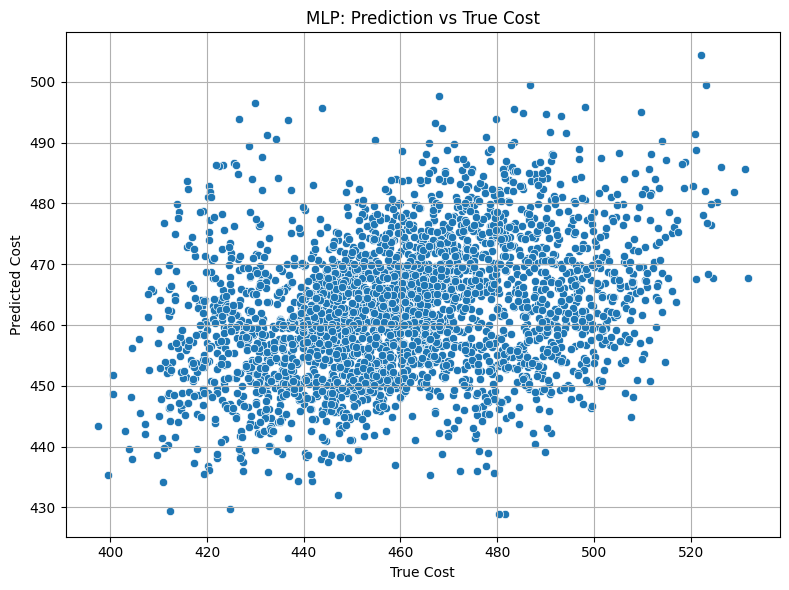

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("data/generated_data.csv")

# Drop duplicates and constant columns
df = df.drop_duplicates()
constant_cols = [col for col in df.columns if df[col].nunique() <= 1]
df.drop(columns=constant_cols, inplace=True)

# Define features and target
X = df.drop(columns=["cost"])
y = df["cost"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split for plotting diagnostics
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models with regularization
models = {
    "Ridge": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, reg_alpha=1, reg_lambda=1, random_state=42),
    "SVR": SVR(C=1.0, epsilon=0.2),
    "MLP": MLPRegressor(hidden_layer_sizes=(100, 50), alpha=0.001, max_iter=500, random_state=42)
}

# Evaluate with cross-validation and store predictions for the best model
results = {}
best_model_name = None
lowest_mae = float('inf')
best_preds = None

for name, model in models.items():
    mae_scores = cross_val_score(model, X_scaled, y, cv=5, scoring=make_scorer(mean_absolute_error))
    mse_scores = cross_val_score(model, X_scaled, y, cv=5, scoring=make_scorer(mean_squared_error))
    avg_mae = mae_scores.mean()
    avg_mse = mse_scores.mean()
    results[name] = {"MAE": avg_mae, "MSE": avg_mse}
    if avg_mae < lowest_mae:
        best_model_name = name
        best_model = model
        best_model.fit(X_train, y_train)
        best_preds = best_model.predict(X_test)
    print(f"{name} - CV MAE: {avg_mae:.2f}, CV MSE: {avg_mse:.2f}")

# Diagnostic plot for the best model
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=best_preds)
plt.xlabel("True Cost")
plt.ylabel("Predicted Cost")
plt.title(f"{best_model_name}: Prediction vs True Cost")
plt.grid(True)
plt.tight_layout()
plt.show()


In [94]:
# Assuming you've already trained the models — assign them to variables
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

# Fit all models here (replace X_train, y_train if needed)
ridge_model = Ridge().fit(X, y_true)
rf_model = RandomForestRegressor(random_state=42).fit(X, y_true)
gb_model = GradientBoostingRegressor(random_state=42).fit(X, y_true)
xgb_model = xgb.XGBRegressor(random_state=42).fit(X, y_true)
svr_model = SVR().fit(X, y_true)
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42).fit(X, y_true)


ValueError: Found input variables with inconsistent numbers of samples: [3000, 15000]

In [87]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load simulation data (true costs and policy configurations)
df = pd.read_csv("data/generated_data.csv")  # or your latest file

# Drop unneeded columns and extract true cost
y_true = df["cost"]
X = df.drop(columns=["cost", "policy_id"], errors="ignore")  # Drop extra if present

# Your trained models (make sure these are trained!)
models = {
    "Ridge": ridge_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "XGBoost": xgb_model,
    "SVR": svr_model,
    "MLP": mlp_model,
}

# Predict costs for each model
results = {}

for name, model in models.items():
    try:
        y_pred = model.predict(X)
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        results[name] = {"MAE": mae, "MSE": mse}

        print(f"{name} - MAE: {mae:.2f}, MSE: {mse:.2f}")

        # Save predictions to the dataframe if needed
        df[f"predicted_cost_{name}"] = y_pred
    except Exception as e:
        print(f"❌ Error for {name}: {e}")


Ridge - MAE: 19.01, MSE: 548.17
Random Forest - MAE: 1.70, MSE: 4.71
Gradient Boosting - MAE: 7.67, MSE: 91.45
XGBoost - MAE: 2.48, MSE: 10.10
SVR - MAE: 19.77, MSE: 595.54
MLP - MAE: 18.23, MSE: 529.62


In [92]:
# Assuming you want to simulate the best policy found by MLP
best_idx = df["predicted_cost_XGBOOST"].idxmin()
best_row = df.loc[best_idx]

from src.policy_kopie import OptimizedBaseStockPolicy  # Or your custom policy wrapper

base_stock_levels = [best_row[f"C{i+1}"] for i in range(config.num_components)]
best_policy = OptimizedBaseStockPolicy(config, base_stock_levels)

sim_cost = evaluator.evaluate_policy(best_policy)
print(f"Simulated cost of best MLP-predicted policy: {sim_cost:.2f}")


KeyError: 'predicted_cost_XGBOOST'

# Models

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    HistGradientBoostingRegressor,
    ExtraTreesRegressor
)
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import time

# --- 1. Load your dataset ---
df = pd.read_csv("./Data/generated_data.csv")  
# --- 2. Feature setup ---
component_cols = sorted([col for col in df.columns if col.startswith("C")])
features = component_cols + ["demand_pattern"]

# Drop constant columns
nunique = df[features].nunique()
constant_cols = nunique[nunique == 1].index.tolist()
features = [col for col in features if col not in constant_cols]

# --- 3. Prepare data ---
X = df[features]
y = df["cost"]

# --- 4. Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) #default 75 - 25 train-test 

# --- 5. Define models ---
models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42),
    # "SVR": SVR(),
    # "MLP": MLPRegressor(random_state=42, max_iter=500)
}

# --- 6. Cross-validation setup ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)

results = []

for name, model in models.items():
    print(f"⏳ Starting {name}...")
    start_time = time.time()

    mae_scores = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')
    mse_scores = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')

    duration = time.time() - start_time
    print(f"✅ Finished {name} in {duration:.2f} seconds")

    results.append((name, mae_scores.mean(), mse_scores.mean(), duration))

# --- 7. Show CV results ---
results_df = pd.DataFrame(results, columns=["Model", "CV MAE", "CV MSE", "Time (s)"]).sort_values("CV MAE")
print("\n📊 Model Performance:")
print(results_df)


⏳ Starting Ridge...
✅ Finished Ridge in 0.09 seconds
⏳ Starting Random Forest...
✅ Finished Random Forest in 277.01 seconds
⏳ Starting Gradient Boosting...
✅ Finished Gradient Boosting in 56.20 seconds
⏳ Starting HistGradientBoosting...
✅ Finished HistGradientBoosting in 11.43 seconds
⏳ Starting Extra Trees...
✅ Finished Extra Trees in 196.43 seconds
⏳ Starting XGBoost...
✅ Finished XGBoost in 2.40 seconds

📊 Model Performance:
                  Model      CV MAE        CV MSE    Time (s)
5               XGBoost   15.860849    551.962301    2.401289
1         Random Forest   16.177081    567.226318  277.010781
4           Extra Trees   16.385670    583.536461  196.432665
3  HistGradientBoosting   19.640664    743.340168   11.433287
2     Gradient Boosting   54.767908   4887.909075   56.196216
0                 Ridge  116.605755  24891.401503    0.090221
